# 104 Pre-Class Assignment: Transformations & Robotics

<img src="https://people.gnome.org/~mathieu/libart/art-affines.png">

Image from: https://people.gnome.org/~mathieu/libart/libart-affine-transformation-matrices.html
    

### Readings for this topic (Recommended in bold)
 * [Heffron Chapter 3.IV pg 241-243](http://joshua.smcvt.edu/linearalgebra/book.pdf)
 * [Beezer Subsection EM pg 340-345](http://linear.ups.edu/download/fcla-3.50-tablet.pdf)
 * [Boyd A little on page 7](http://vmls-book.stanford.edu/vmls.pdf)


### Goals for today's pre-class assignment 


1. [Review](#Review)
1. [Affine Transforms Examples](#Affine_Transforms)
1. [2D Forward Kinematics](#2D_Forward_Kinematics)
1. [Assignment Wrap-up](#T3)

Reference: https://studywolf.wordpress.com/2013/08/21/robot-control-forward-transformation-matrices/

----

<a name="Review"></a>
## 1. Review

&#9989; **<font color=red>QUESTION:</font>**  Compute $2u+3v$ for vectors $u = (1,2, 6)$ and $v = (4, -1, 3)$.

Put your answer here

&#9989; **<font color=red>QUESTION:</font>**  Matrix $A$ is of size ($m_1 \times n_1$) and matrix $B$ is of size ($m_2 \times n_2$).  What must be true about the dimensions in order to multiply $A \times B$?  

Put your answer here

&#9989;  **<font color=red>QUESTION:</font>**   Is an invertible matrix is always square? Why or why not?

Put your answer here

&#9989;  **<font color=red>QUESTION:</font>**  Is a square matrix always invertible? Why or why not?

Put your answer here

&#9989;  **<font color=red>QUESTION:</font>** Describe the Reduced Row Echelon form of a square, invertible matrix.

Put your answer here

&#9989;  **<font color=red>QUESTION:</font>** Is the following matrix in the Reduced Row Echelon form? 

$$
\left[
\begin{matrix}
    1 & 2 & 0 & 3 & 1 & 4 \\ 
    0 & 0 & 1 & 3 & 1 & 7 \\ 
    0 & 0 & 0 & 0 & 1 & 6 \\ 
    0 & 0 & 0 & 0 & 0 & 0  
\end{matrix}
\right]
$$

Put your answer here

&#9989;  **<font color=red>QUESTION:</font>** If the matrix shown above is not in Reduced Row Echelon form. Name a rule that is violated?

Put your answer here

&#9989;  **<font color=red>QUESTION:</font>** What is the size of the matrix described in the previous QUESTION?

- $4 \times 6$
- $6 \times 4$
- $3 \times 6$
- $5 \times 3$



Put your answer here

&#9989;  **<font color=red>QUESTION:</font>**  Describe the elementary row operation that is implemented by the following matrix


$$
\left[
\begin{matrix}
    0 & 1 & 0 \\ 
    1 & 0 & 0 \\ 
    0 & 0 & 1 
\end{matrix}
\right]
$$

Put your answer here

----
<a name="Affine_Transforms"></a>
## 2. Affine Transforms

Previously in class we talked about how matrix multiplication can change the color-vector of a pixel in a digital image. In this section we will show some examples of how matrix multiplication can be used to produce basic geometric transformations of vectors representing points in the $xy$-plane.

The following code is designed to demonstrate the properties of some different transformation matrices. Pay attention to the format of the matrices in relation to the geometric change they produce. 

&#9989; **<font color=red>DO THIS:</font>** Review the following code.  

In [1]:
#Some python packages we will be using
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D #Lets us make 3D plots
import numpy as np
import sympy as sym
sym.init_printing(use_unicode=True) # Trick to make matrixes look nice in jupyter

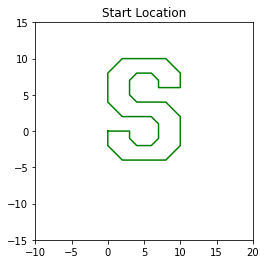

In [2]:
# Define some points
x = [0.0,  0.0,  2.0,  8.0, 10.0, 10.0, 8.0, 4.0, 3.0, 3.0, 4.0, 6.0, 7.0, 7.0, 10.0, 
     10.0,  8.0,  2.0, 0.0, 0.0, 2.0, 6.0, 7.0,  7.0,  6.0,  4.0,  3.0, 3.0, 0.0]
y = [0.0, -2.0, -4.0, -4.0, -2.0,  2.0, 4.0, 4.0, 5.0, 7.0, 8.0, 8.0, 7.0, 6.0,  6.0,
     8.0, 10.0, 10.0, 8.0, 4.0, 2.0, 2.0, 1.0, -1.0, -2.0, -2.0, -1.0, 0.0, 0.0]
con = [ 1.0 for i in range(len(x))] 

p = np.matrix([x,y,con])


mp = p.copy()

#Plot Points
plt.plot(mp[0,:].tolist()[0],mp[1,:].tolist()[0], color='green');
plt.axis('scaled');
plt.axis([-10,20,-15,15]);
plt.title('Start Location');

### Example Scaling Matrix

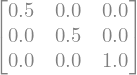

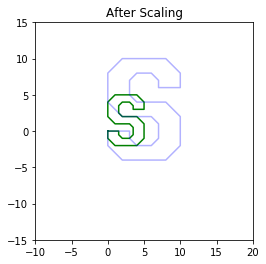

In [3]:
#Example Scaling Matrix

#Define Matrix
scale = 0.5  #The amount that coordinates are scaled.
S = np.matrix([[scale,0,0], [0,scale,0], [0,0,1]])

#Apply matrix

mp = p.copy()
mp = S*mp

#Plot points after transform
plt.plot(mp[0,:].tolist()[0],mp[1,:].tolist()[0], color='green')
plt.axis('scaled')
plt.axis([-10,20,-15,15])
plt.title('After Scaling')

#Uncomment the next line if you want to see the original.
plt.plot(p[0,:].tolist()[0],p[1,:].tolist()[0], color='blue',alpha=0.3);

sym.Matrix(S)

### Example Translation Matrix

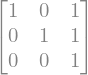

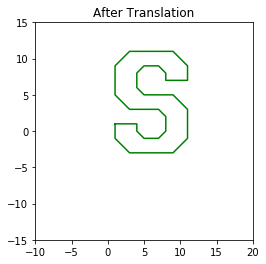

In [4]:
#Example Translation Matrix

#Define Matrix
dx = 1  #The amount shifted in the x-direction
dy = 1  #The amount shifted in the y-direction
T = np.matrix([[1,0,dx], [0,1,dy], [0,0,1]])

#Apply matrix

mp = p.copy()

mp = T*mp

#Plot points after transform
plt.plot(mp[0,:].tolist()[0],mp[1,:].tolist()[0], color='green')
plt.axis('scaled')
plt.axis([-10,20,-15,15])
plt.title('After Translation')

#Uncomment the next line if you want to see the original.
# plt.plot(p[0,:].tolist()[0],p[1,:].tolist()[0], color='blue',alpha=0.3);

sym.Matrix(T)

### Example Reflection Matrix

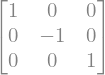

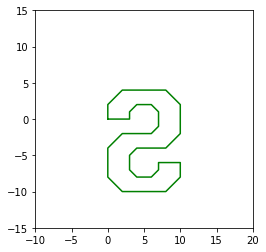

In [5]:
#Example Reflection Matrix

#Define Matrix
Re = np.matrix([[1,0,0],[0,-1,0],[0,0,1]]) ## Makes all y-values opposite so it reflects over the x-axis.

#Apply matrix

mp = p.copy()

mp = Re*mp

#Plot points after transform
plt.plot(mp[0,:].tolist()[0],mp[1,:].tolist()[0], color='green')
plt.axis('scaled')
plt.axis([-10,20,-15,15])

#Uncomment the next line if you want to see the original.
# plt.plot(p[0,:].tolist()[0],p[1,:].tolist()[0], color='blue',alpha=0.3);

sym.Matrix(Re)

### Example Rotation Matrix

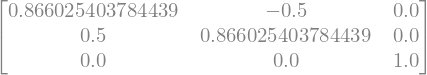

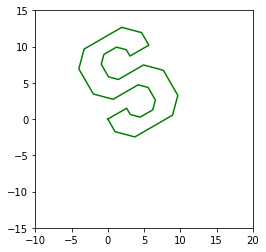

In [6]:
#Example Rotation Matrix

#Define Matrix
degrees = 30
theta = degrees * np.pi / 180  ##Make sure to always convert from degrees to radians. 

# Rotates the points 30 degrees counterclockwise.
R = np.matrix([[np.cos(theta),-np.sin(theta),0],[np.sin(theta), np.cos(theta),0],[0,0,1]]) 

#Apply matrix
mp = p.copy()

mp = R*mp

#Plot points after transform
plt.plot(mp[0,:].tolist()[0],mp[1,:].tolist()[0], color='green')
plt.axis('scaled')
plt.axis([-10,20,-15,15])

#Uncomment the next line if you want to see the original.
# plt.plot(p[0,:].tolist()[0],p[1,:].tolist()[0], color='blue',alpha=0.3);

sym.Matrix(R)

### Example Shear Matrix

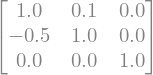

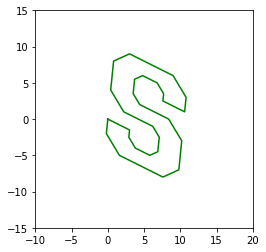

In [7]:
#Example Shear Matrix

#Define Matrix
shx = 0.1
shy = -0.5
SH = np.matrix([[1,shx,0], [shy,1,0], [0,0,1]])

#Apply matrix

mp = p.copy()

mp = SH*mp

#Plot points after transform
plt.plot(mp[0,:].tolist()[0],mp[1,:].tolist()[0], color='green')
plt.axis('scaled')
plt.axis([-10,20,-15,15])

sym.Matrix(SH)

&#9989; **<font color=red>Question:</font>**  Why are we using $3 \times 3$ matrices to change points in 2D-space? 

**Hint.** Go back and look at the third column of the transformation matrices.

In [8]:
#Put your code here

## Robotics and Reference Frames

<img alt="Image of a 6-axis FANUC robot used in industry" src="http://www.fanuc.com/product/image/m2000ia.jpg" width="15%">

Image from: [www.fanuc.com](http://www.fanuc.com/)

In the robotics sections we are essentially using compositions of affine transformations to move the "origin" of a coordinate system to describe the position of the tip of the robot arm in relation to the base of the macine.

----

<a name="2D_Forward_Kinematics"></a>
### 3. 2D Forward Kinematics
<img src="https://lh5.googleusercontent.com/S70gMT_jN3x0hSoCAapLydJNeYZYmcetjf09XiF0YsO2QbBZHiIq9VpY4Mc6ocuBphgJeUxDC5JZ10UkpQDhe2XW6NJQPDzVp3ool_fiHXHU-MRMChMcY93vZXoE=w263" width="25%">

This robot can move in the $x-y$ plane.  We can represent the configuration of the robot in its "*Joint Space*" by knowing the two joint angles or $[a_1,a_2]$.  However what we would like is to represent the location of the end of the robot (often called the "end effector" or "hand") in "world" coordinates (i.e. $x-y$ coordinate system). 

Today, we will use Linear Algebra and simple transformation matrices to try and calculate how to go from "joint" coordinates to "world" coordinates.  

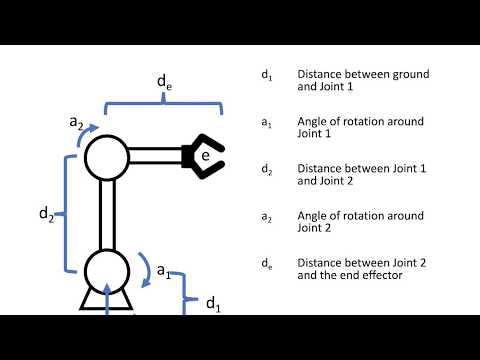

In [9]:
from IPython.display import YouTubeVideo
YouTubeVideo("aCohcLYrYcY",width=640,height=360, cc_load_policy=True)

### Single axis Robot

The following code draws a simple single axis (single joint) robot with its joint centered at the origin and its initial angle of zero with an robot arm length of 4 "units" long.

In [10]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
from ipywidgets import interact
import sympy as sym
sym.init_printing(True)

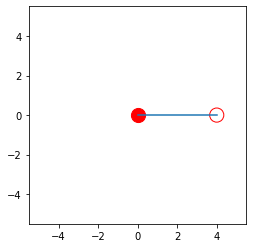

In [11]:
plt.scatter(4,0, s=200, facecolors='none', edgecolors='r') #plot end effector
plt.scatter(0,0, s=200, facecolors='r', edgecolors='r') # plot origin
plt.plot([0,4],[0,0]) #plot blue line for arm
plt.axis('square')
plt.xlim([-5.5,5.5])
plt.ylim([-5.5,5.5])
    

A 2D rotation matrix around the origin is defined as the following:

$$ 
\left[ \begin{matrix}
    x_{end} \\
    y_{end} 
 \end{matrix}
\right] 
=
\left[ \begin{matrix}
    \cos(a) & -\sin(a) \\
    \sin(a) & \cos(qa 
 \end{matrix}
\right] 
\left[ \begin{matrix}
    x_{start} \\
    y_{start} 
 \end{matrix}
\right] 
$$ 

The following rotation matrix will rotate the point $45^o$ around the origin:

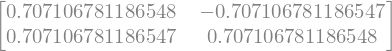

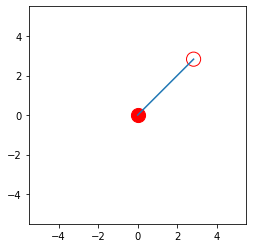

In [12]:
p = [[4],[0]]

a1=np.pi/4

R = np.matrix([[np.cos(a1), -np.sin(a1)], [np.sin(a1), np.cos(a1)]])

p2 = R*p

x1 = p2[0,0]
y1 = p2[1,0]

plt.scatter(x1,y1, s=200, facecolors='none', edgecolors='r') #plot end effector
plt.scatter(0,0, s=200, facecolors='r', edgecolors='r') # plot origin
plt.plot([0,x1],[0,y1]) #plot blue line for arm
plt.axis('square')
plt.xlim([-5.5,5.5])
plt.ylim([-5.5,5.5])
sym.Matrix(R)

The following code uses the Jupyter ```interact``` function and ```numpy``` to make an interactive view of the above.  This lets us change the value of the rotation motor and see how it changes the robot. The input to the function is the axis angle and the output is the $x-y$ coordinates.

**Note:** it can take some time for the interaction to catch up.  Try moving the slider slowly...

In [13]:
def Robot_Simulator(q1=0):
    a1 = q1/180  * np.pi
    p0 = np.matrix([4,0]).T
    p = p0
    J1 = np.matrix([[np.cos(a1), -np.sin(a1)], [np.sin(a1), np.cos(a1)]]) 
    p = np.concatenate( ( J1*p, np.matrix([0,0]).T), axis=1 )
    
    plt.scatter(p[0,:].tolist()[0],p[1,:].tolist()[0], s=200, facecolors='none', edgecolors='r')
    plt.scatter(0,0, s=200, facecolors='r', edgecolors='r')
    plt.plot(p[0,:].tolist()[0],p[1,:].tolist()[0])
    plt.axis('square')
    plt.xlim([-5.5,5.5])
    plt.ylim([-5.5,5.5])
    ax = plt.gca()
    plt.show()
    return([ p[0,0], p[1,0] ])
    
p = interact(Robot_Simulator, q1=(-180,180,2));

interactive(children=(IntSlider(value=0, description='q1', max=180, min=-180, step=2), Output()), _dom_classes…

&#9989; **<font color=red>DO THIS:</font>**  Inspect the above code. 

&#9989; **<font color=red>QUESTION:</font>** Which line of the code defines the transformation matrix for the robot joint?  

**Hint.** If you click on a cell and press ``esc + L`` you can toggle the line numbers. 

&#9989; **<font color=red>QUESTION:</font>** Which line of code defines the length of the robot arm? 

(Note you can turn line numbers on and off in jupyterhub.  Use the menu at the top to figure out how.)

### Multi axis robot

Now, let's consider the robot from the video:

<img src="https://lh3.googleusercontent.com/zCoCDGfsr8z3vqaGEfRYLH_YcDOrb2GRXOjkSEH0ASjxVH2FrRiXpa8c7NaQw0FYjXyX1rQXbpRmxXk7pg5KEnAE8lWb2m3Sorp5Kj7OIduFiMnMuI3oV2Vy0Mn0=w720" width="75%">

Notice it has two joints $a_1$ and $a_2$ and offset lengths of $d_1$, $d_2$ and $d_e$. The joint space for this robot is just its angles $[a_1, a_2]$. However, what we want is to know the location of end effector point $p_e$ at the gripper in the "world" reference frame, which the bottom most axies "on the ground".  

At each joint, we can define a reference frame that rotates and then transforms the origin to the ealier joint. The forward transformation matrices capture the relationship between the reference frames of different links of the robot. 

For example, We can move from the base motor, or $p_1$, reference frame to the world, or $p_w$, reference frame using the following equations:

$$ 
p_w
=
\left[ \begin{matrix}
    \cos(a_1) & -\sin(a_1) \\
    \sin(a_1) & \cos(a_1) 
 \end{matrix}
\right] 
p_1
+ 
\left[ \begin{matrix}
    0 \\
    d_1 
 \end{matrix}
\right].
$$ 


The equation shown  above are a little tricky to work with because the$ \left[ \begin{matrix}
    0 \\
    d_1 
 \end{matrix}
\right] $ part makes the equation non-linear 
(if you don't believe me? 
Remember the rules for making a function linear and apply them and see for yourself). 
However, there is an easy trick in Linear Algebra to convert the above to one big linear matrix. 
This trick  requires us to keep an extra 1 (one) for each point but makes the math work out nicely. 
Basically the trick works as follows:

$$ 
\left[ \begin{matrix}
    x_w \\
    y_w \\
    1 
 \end{matrix}
\right] 
=
\left[ \begin{matrix}
    cos(a_1) & -sin(a_1) & 0 \\
    sin(a_1) & cos(a_1) & d_1 \\
    0 & 0 & 1
 \end{matrix}
\right] 
\left[ \begin{matrix}
    x_1 \\
    y_1 \\
    1 
 \end{matrix}
\right] 
$$ 

Let's call the transformation matrix for Joint 1, $J_1$, and we can rewrite the equations as follows:

$$p_1 = J_1p_2$$

&#9989; **<font color=red>DO THIS</font>** On your own, write out the above matrix multiplication and convince yourself that it is the same as the one above. 

Now, we can move from the $p_2$ reference frame to the $p_1$  reference frame basically the same equation:

$$ 
\left[ \begin{matrix}
    x_1 \\
    y_1 \\
    1 
 \end{matrix}
\right] 
=
\left[ \begin{matrix}
    cos(a_2) & -sin(a_2) & d_2 \\
    sin(a_2) & cos(a_2) & 0 \\
    0 & 0 & 1
 \end{matrix}
\right] 
\left[ \begin{matrix}
    x_2 \\
    y_2 \\
    1 
 \end{matrix}
\right] 
$$ 


For the last step we can do a simple linear transpose from the end effector $p_e$ reference frame to the $p_2$ reference frame:

$$ 
\left[ \begin{matrix}
    x_2 \\
    y_2 \\
    1 
 \end{matrix}
\right] 
=
\left[ \begin{matrix}
    1 & 0 & d_2 \\
    0 & 1 & 0 \\
    0 & 0 & 1
 \end{matrix}
\right] 
\left[ \begin{matrix}
    x_e \\
    y_e \\
    1 
 \end{matrix}
\right] 
$$ 

If we call each transformation matrix $J_1, J_2, J_e$ then hopefully you can see that we can string these transformation matrices together such that we get a single transform from the end effector all the way back to the world coordinates as follows:

$$p_w = J_1J_2J_ep_e$$



Let's see what this looks like in Python.  I am going to use ```numpy```. The plotting gets a little awkward but hopefully it makes sense.

First, lets initialize the variables to some discreet numbers:


In [14]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
from ipywidgets import interact

#Initial state
a1 = 0
a2 = 0

#Lenths of the offsets
d1 = 0.5
d2 = 3
de = 3

Next, I am going to define a set of points in the end effector coordinate system.  These points are picked to form a sort of "C" shaped designed to look sort of like an end effector.  I will plot them to help show you what I mean:

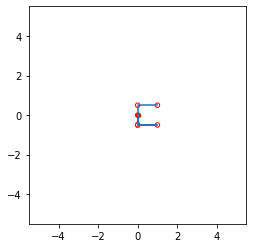

In [15]:
#Points needed to define a square
pe = np.matrix([[1, 0.5, 1],[0,0.5,1],[0,-0.5, 1],[1,-0.5, 1],[0,-0.5, 1],[0,0, 1]]).T
p = pe

plt.scatter(p[0,:].tolist()[0],p[1,:].tolist()[0], s=20, facecolors='none', edgecolors='r')
plt.scatter(0,0, s=20, facecolors='r', edgecolors='r')
plt.plot(p[0,:].tolist()[0],p[1,:].tolist()[0])
plt.axis('scaled')
plt.xlim([-5.5,5.5])
plt.ylim([-5.5,5.5])

The next step is to apply the $J_e$ transformation matrix to the gripper points which will put them in the $p_2$ coordinate system.  Once the points are transposed the code concatenates the origin (0,0) onto the list of points so we can part of the robot arm in the plot:

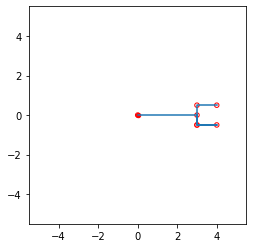

In [16]:
Je = np.matrix([[1, 0, de], 
                [0, 1, 0], 
                [0,0,1]]) 

p = np.concatenate( ( Je*p, np.matrix([0,0,1]).T), axis=1 )

plt.scatter(p[0,:].tolist()[0],p[1,:].tolist()[0], s=20, facecolors='none', edgecolors='r')
plt.scatter(0,0, s=20, facecolors='r', edgecolors='r')
plt.plot(p[0,:].tolist()[0],p[1,:].tolist()[0])
plt.axis('scaled')
plt.xlim([-5.5,5.5])
plt.ylim([-5.5,5.5])

We do this again.  Apply the $J_2$ transformation matrix to put the points into the $p_1$ coordinate system,  concatenate the origin and plot the results. 

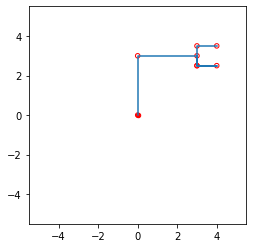

In [17]:
J2 = np.matrix([[np.cos(a2), -np.sin(a2), 0], 
                [np.sin(a2), np.cos(a2), d2], 
                [0,0,1]]) 

p = np.concatenate( ( J2*p, np.matrix([0,0,1]).T), axis=1 )

plt.scatter(p[0,:].tolist()[0],p[1,:].tolist()[0], s=20, facecolors='none', edgecolors='r')
plt.scatter(0,0, s=20, facecolors='r', edgecolors='r')
plt.plot(p[0,:].tolist()[0],p[1,:].tolist()[0])
plt.axis('scaled')
plt.xlim([-5.5,5.5])
plt.ylim([-5.5,5.5])

We do it yet again.   Apply the $J_1$ transformation matrix which will put the points in the $p_w$ coordinate system,  concatenate the origin and plot the results. The result is a skeletal frame representing our robot. 

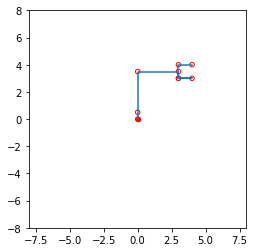

In [18]:
J1 = np.matrix([[np.cos(a1), -np.sin(a1), 0], 
                [np.sin(a1), np.cos(a1), d1], 
                [0,0,1]]) 

p = np.concatenate( ( J1*p, np.matrix([0,0,1]).T), axis=1 )

plt.scatter(p[0,:].tolist()[0],p[1,:].tolist()[0], s=20, facecolors='none', edgecolors='r')
plt.scatter(0,0, s=20, facecolors='r', edgecolors='r')
plt.plot(p[0,:].tolist()[0],p[1,:].tolist()[0])
plt.axis('scaled')
plt.xlim([-8,8])
plt.ylim([-8,8])

&#9989; **<font color=red>DO THIS:</font>** Modify the rotation variables ```a1``` and ```a2``` in the above code and see if the new robot configuration looks right. **_HINT_** make sure your angles are in radians.

The following is the same code as above but put into an interactive function to make the code easier to play with:

In [19]:
from ipywidgets import interact, interact_manual

def Robot_Simulator(q1=0,q2=-0):
    a1 = q1/180  * np.pi
    a2 = q2/180  * np.pi

    d1 = 0.5
    d2 = 3
    de = 3
    
    target = np.matrix([-3,2, 1])
    print(target)

    pe = np.matrix([[1, 0.5, 1],[0,0.5,1],[0,-0.5, 1],[1,-0.5, 1],[0,-0.5, 1],[0,0, 1]]).T

    Je = np.matrix([[1, 0, de], 
                    [0, 1, 0], 
                    [0,0,1]]) 
    p = np.concatenate( ( Je*pe, np.matrix([0,0,1]).T), axis=1 )    

    J2 = np.matrix([[np.cos(a2), -np.sin(a2), 0], 
                    [np.sin(a2), np.cos(a2), d2], 
                    [0,0,1]]) 
    p = np.concatenate( ( J2*p, np.matrix([0,0,1]).T), axis=1 )

    J1 = np.matrix([[np.cos(a1), -np.sin(a1), 0], 
                    [np.sin(a1), np.cos(a1), d1], 
                    [0,0,1]]) 
    p = np.concatenate( ( J1*p, np.matrix([0,0,1]).T), axis=1 )


    plt.scatter(p[0,:].tolist()[0],p[1,:].tolist()[0], s=20, facecolors='none', edgecolors='r')
    plt.scatter(0,0, s=20, facecolors='r', edgecolors='r')
    plt.plot(p[0,:].tolist()[0],p[1,:].tolist()[0])
    plt.plot(target[0,0], target[0,1],'*')
    plt.axis('scaled')
    plt.xlim([-8,8])
    plt.ylim([-8,8])

    plt.show()
    
target = interact(Robot_Simulator, q1=(-180,180), q2=(-180,180));

interactive(children=(IntSlider(value=0, description='q1', max=180, min=-180), IntSlider(value=0, description=…

**Note.** If the ``interact`` plot is really choppy on your machine this is because the function is coninuously updating as you move the sliders. Consider replacing the ``interact`` function with ``interact_manual`` to eliminate the continuous updates. You will have to change the import code in line 1. 

&#9989; **<font color=red>QUESTION:</font>** Move the above robot so that the end effector is "gripping" the target (yellow/orangeish star). 
Notice that there is more than one point in the "joint space" that gives the same answer. 
This is the reverse Kinematic problem (which is harder). 
We know the point we want but we need to find the joints that put the robot at that point. 

&#9989; **<font color=red>DO THIS:</font>** The code in the following cell is cut and pasted from above. Modify the code to add a third Joint to the robot.

In [20]:
from ipywidgets import interact, interact_manual

def Robot_Simulator(q1=0,q2=0):
    a1 = q1/180  * np.pi
    a2 = q2/180  * np.pi
    #####Start your code here #####    

    #####End of your code here#####     

    d1 = 0.5
    d2 = 3
    de = 3
    #####Start your code here #####    

    #####End of your code here#####     
    
    
    target = np.matrix([-3,2, 1])
    print(target)

    pe = np.matrix([[1, 0.5, 1],[0,0.5,1],[0,-0.5, 1],[1,-0.5, 1],[0,-0.5, 1],[0,0, 1]]).T

    Je = np.matrix([[1, 0, de], 
                    [0, 1, 0], 
                    [0,0,1]]) 
    p = np.concatenate( ( Je*pe, np.matrix([0,0,1]).T), axis=1 )    

    #####Start your code here #####    

    #####End of your code here#####     
    
    J2 = np.matrix([[np.cos(a2), -np.sin(a2), 0], 
                    [np.sin(a2), np.cos(a2), d2], 
                    [0,0,1]]) 
    p = np.concatenate( ( J2*p, np.matrix([0,0,1]).T), axis=1 )

    J1 = np.matrix([[np.cos(a1), -np.sin(a1), 0], 
                    [np.sin(a1), np.cos(a1), d1], 
                    [0,0,1]]) 
    
    p = np.concatenate( ( J1*p, np.matrix([0,0,1]).T), axis=1 )


    plt.scatter(p[0,:].tolist()[0],p[1,:].tolist()[0], s=20, facecolors='none', edgecolors='r')
    plt.scatter(0,0, s=20, facecolors='r', edgecolors='r')
    plt.plot(p[0,:].tolist()[0],p[1,:].tolist()[0])
    plt.plot(target[0,0], target[0,1],'*')
    plt.axis('scaled')
    plt.xlim([-8,8])
    plt.ylim([-8,8])

    plt.show()
    
target = interact(Robot_Simulator, q1=(-180,180), q2=(-180,180));

interactive(children=(IntSlider(value=0, description='q1', max=180, min=-180), IntSlider(value=0, description=…

&#9989; **<font color=red>Assignment-Specific QUESTION:</font>** What three angles did you find that place the robot on the star. 

Enter answer here.

---
<a name="T3"></a>
## 4. Assignment wrap up


Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!** If you cannont load the form below please try logging in to [spartan365.msu.edu](http://spartan365.msu.edu/) and try running it again, or simply use the direct link provided below. 

[Direct Link to Microsoft Form](https://forms.office.com/r/n0PEF9xt59)



&#9989; **<font color=red>Assignment-Specific QUESTION:</font>** What three angles did you find that place the robot on the star. 

Enter answer here.

In [21]:
from IPython.display import HTML
HTML(
"""
<iframe width="640px" height= "480px" src= "https://forms.office.com/Pages/ResponsePage.aspx?id=MHEXIi9k2UGSEXQjetVofSS1ePbivlBPgYEBiz_zsf1UOTk3QU5VVEo1SVpKWlpaWlU4WTlDUlQwWi4u&embed=true" frameborder= "0" marginwidth= "0" marginheight= "0" style= "border: none; max-width:100%; max-height:100vh" allowfullscreen webkitallowfullscreen mozallowfullscreen msallowfullscreen> </iframe>
"""
)

---------
### Congratulations, we're done!

###EndPreClass###


Written by Dr. Dirk Colbry, and Dr. Matthew Mills, Michigan State University
<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.

----